# Denoising

In [1]:
import os
import numpy as np
from matplotlib import cm

In [14]:
from tinymesh import Mesh, denoise_normal_bilateral, denoise_normal_gaussian, denoise_l0_smooth, get_hausdorff_distance, get_per_vertex_shortest_distances
from viewer import Viewer

## Load mesh file

In [15]:
models_dir = "../../data/models"
filename = os.path.join(models_dir, "fandisk.ply")
mesh = Mesh(filename)

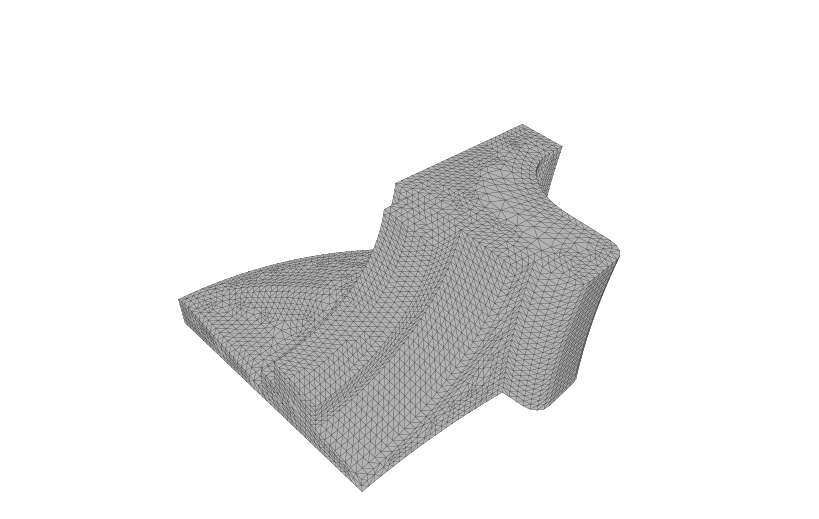

In [16]:
viewer = Viewer(800, 500)
viewer.lookat(5, 5, -5, 0, 0, 0, 0, 1, 0)
viewer.perspective(45, viewer.aspect, 1, 100)
viewer.mesh_visualization(mesh)

## Add noise

In [17]:
noisy = mesh.clone()
for i in range(noisy.num_vertices()):
    v = noisy.vertex(i)
    pos = v.pos() + np.random.uniform(-0.05, 0.05, size=(3))
    v.set_pos(pos)

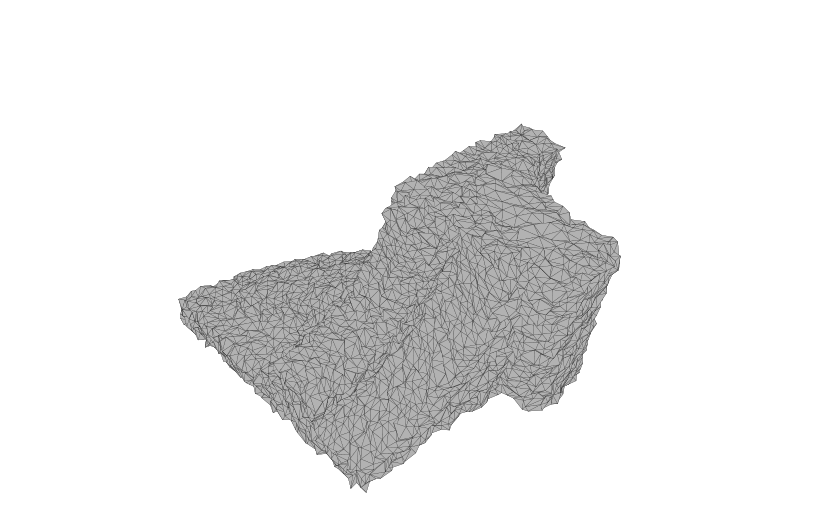

In [18]:
viewer.mesh_visualization(noisy)

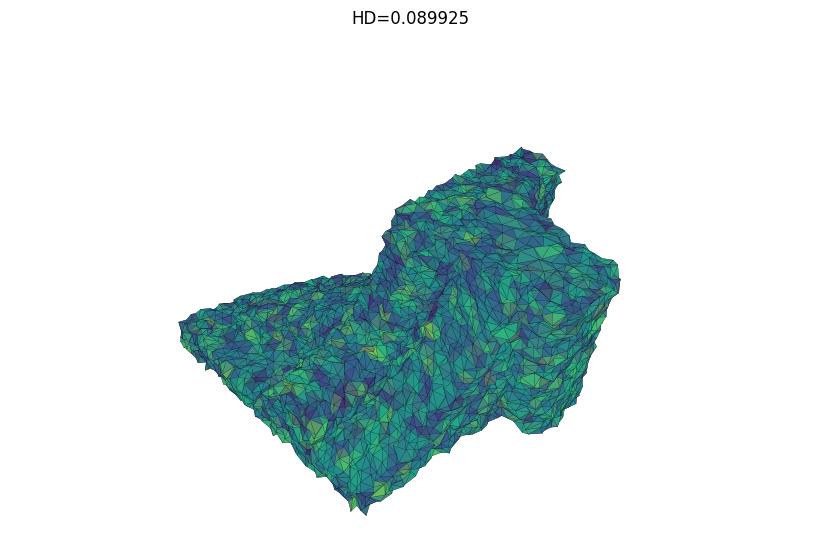

In [26]:
errs = get_per_vertex_shortest_distances(noisy, mesh)
emax, emin = errs.max(), errs.min()
errs = 1.0 * (errs - emin) / (emax - emin)
colors = cm.viridis(errs)
hd = get_hausdorff_distance(noisy, mesh)
viewer.mesh_visualization(noisy, colors=colors, title='HD={:f}'.format(hd))

## Denoising

### Gaussian normal filtering

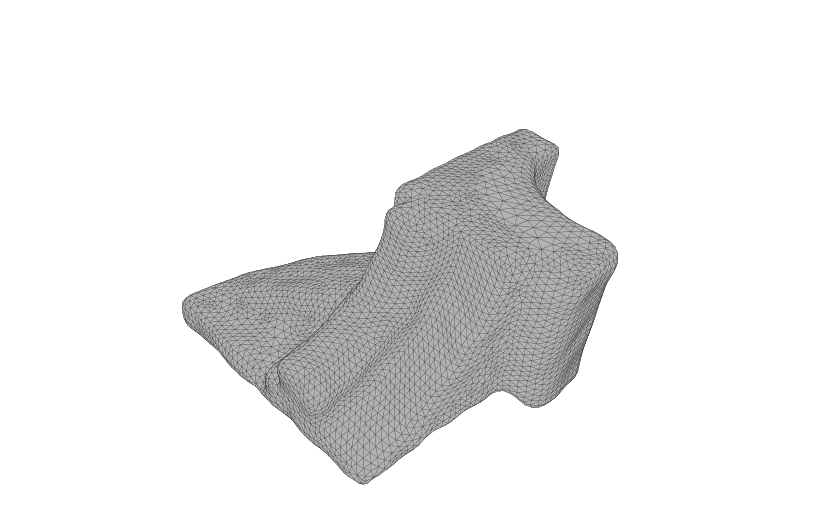

In [27]:
result = noisy.clone()
denoise_normal_gaussian(result, sigma=0.2, iterations=5)
viewer.mesh_visualization(result)

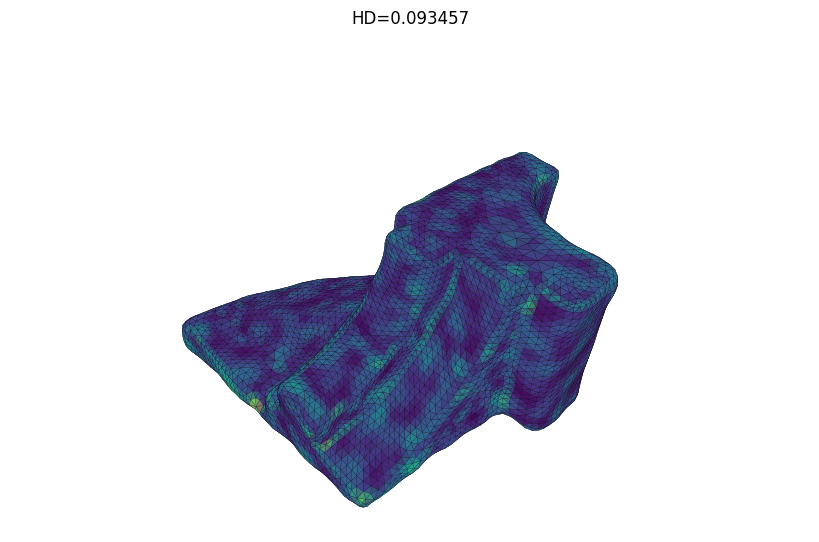

In [28]:
errs = get_per_vertex_shortest_distances(result, mesh)
emax, emin = errs.max(), errs.min()
errs = 1.0 * (errs - emin) / (emax - emin)
colors = cm.viridis(errs)
hd = get_hausdorff_distance(result, mesh)
viewer.mesh_visualization(result, colors=colors, title='HD={:f}'.format(hd))

### Bilateral normal filtering

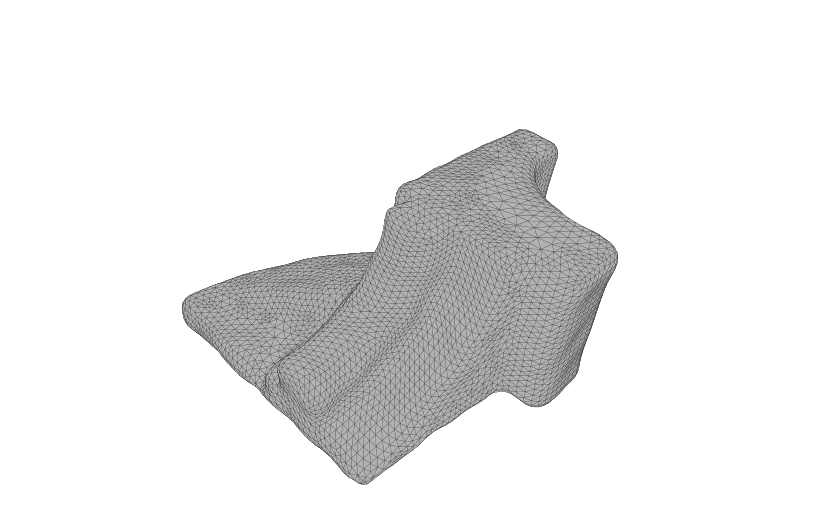

In [29]:
result = noisy.clone()
denoise_normal_bilateral(result, sigma_c=0.1, sigma_s=0.2, iterations=10)
viewer.mesh_visualization(result)

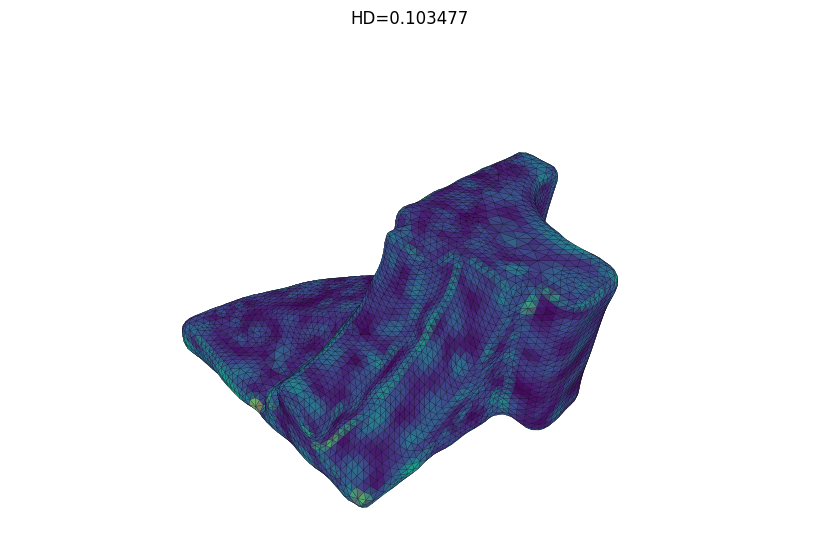

In [30]:
errs = get_per_vertex_shortest_distances(result, mesh)
emax, emin = errs.max(), errs.min()
errs = 1.0 * (errs - emin) / (emax - emin)
colors = cm.viridis(errs)
hd = get_hausdorff_distance(result, mesh)
viewer.mesh_visualization(result, colors=colors, title='HD={:f}'.format(hd))

### L0 mesh smoothing

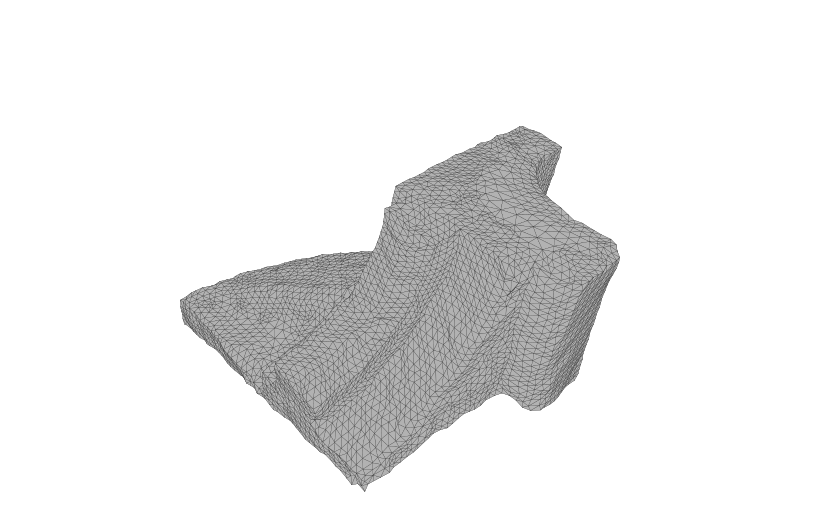

In [31]:
result = noisy.clone()
denoise_l0_smooth(result)
viewer.mesh_visualization(result)

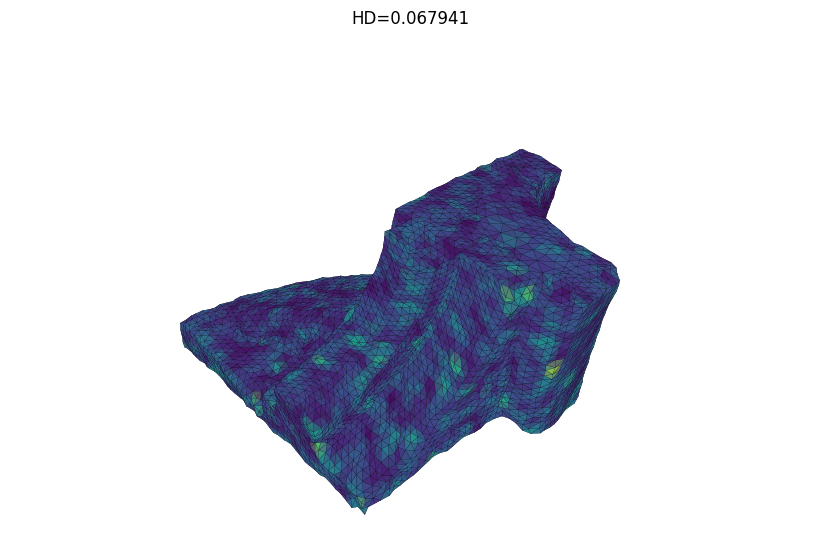

In [32]:
errs = get_per_vertex_shortest_distances(result, mesh)
emax, emin = errs.max(), errs.min()
errs = 1.0 * (errs - emin) / (emax - emin)
colors = cm.viridis(errs)
hd = get_hausdorff_distance(result, mesh)
viewer.mesh_visualization(result, colors=colors, title='HD={:f}'.format(hd))